In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [33]:
import pandas as pd              # For data handling and manipulation
import numpy as np               # For numerical operations (optional but handy)
import matplotlib.pyplot as plt  # For plotting and visualization
import seaborn as sns            # For nicer plots (optional)

from sklearn.model_selection import train_test_split    # To split data into train/test
from sklearn.linear_model import LinearRegression       # The linear regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Evaluation metrics
from sklearn.preprocessing import OneHotEncoder         # For encoding categorical variables
from sklearn.compose import ColumnTransformer            # To apply transformations selectively
from sklearn.pipeline import Pipeline                     # To combine preprocessing and modeling steps


In [34]:
import warnings
warnings.filterwarnings('ignore')


In [35]:
df = pd.read_csv(r"C:\Users\satya\OneDrive\Documents\projects\ml projects\medical insurance predictor\insurance.csv")
print(df.head(10))
print(df.tail(10))
df.info()
print(df.describe())
# Optional: check the distribution of categorical variables
print(df['sex'].value_counts())
print(df['smoker'].value_counts())
print(df['region'].value_counts())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692
      age     sex     bmi  children smoker     region      charges
1328   23  female  24.225         2     no  northeast  22395.74424
1329   52    male  38.600         2     no  southwest  10325.20600
1330   57  female  25.740         2     no  southeast  12629.16560
1331   23  female  33.400   

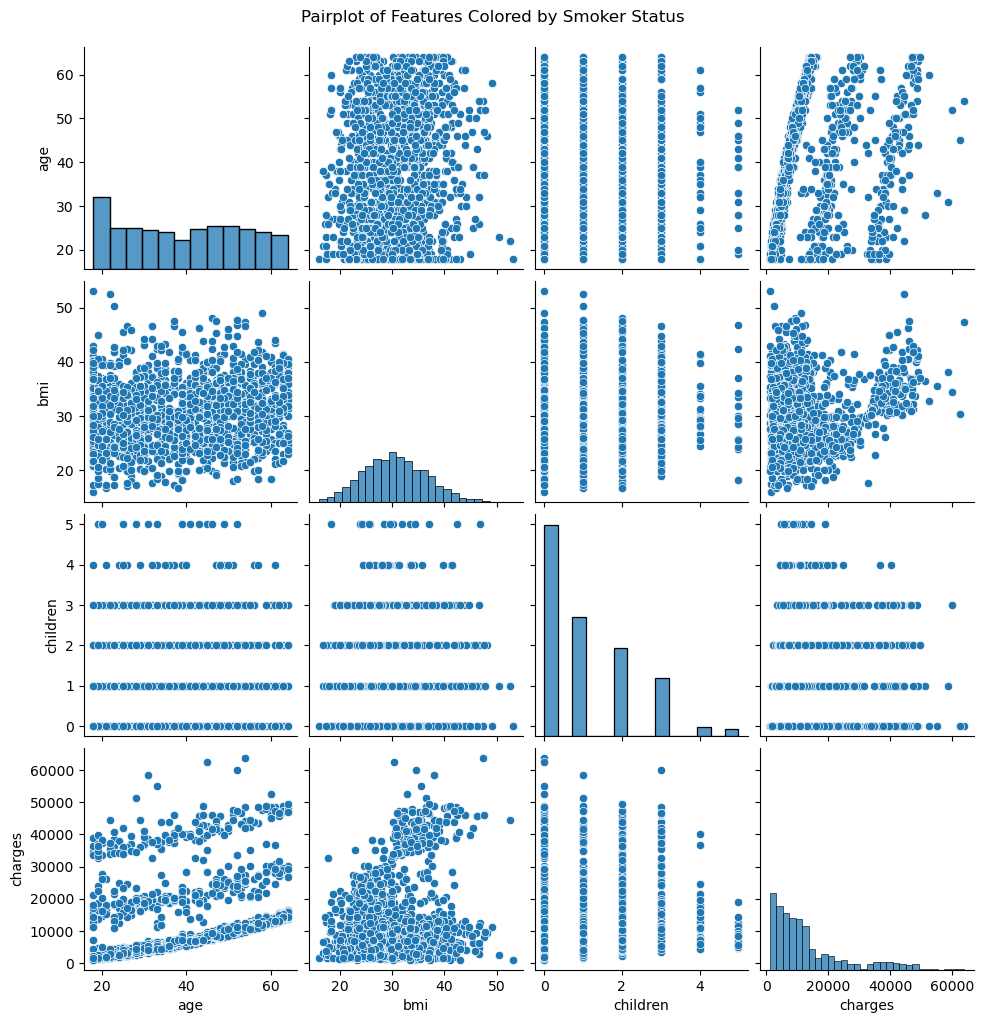

In [36]:
# Pairplot: shows scatterplots and histograms for all pairs of numeric variables
sns.pairplot(df)  # hue='smoker' colors points by smoker status for more insight
plt.suptitle('Pairplot of Features Colored by Smoker Status', y=1.02)
plt.show()

In [37]:
corr_matrix = df.select_dtypes(include='number').corr()
print("Correlation Matrix:")
print(corr_matrix)


Correlation Matrix:
               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


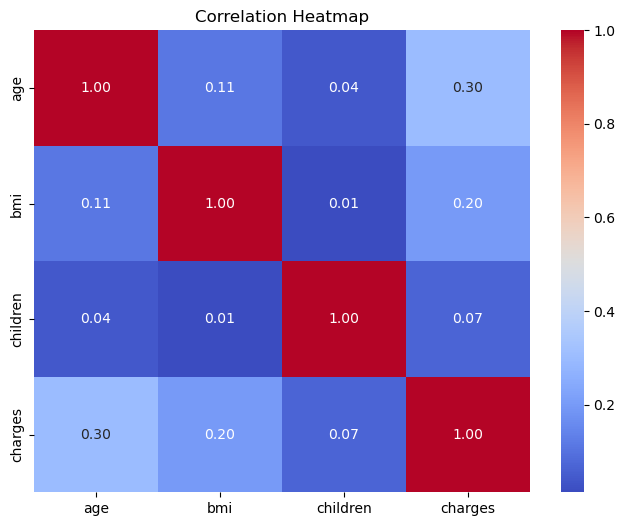

In [38]:
# Heatmap of correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

handling missing values


In [39]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [40]:
print(f"Duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(df.describe())

# Optionally, check data types
print(df.dtypes)

Duplicate rows: 1
               age          bmi     children       charges
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222139    30.663452     1.095737  13279.121487
std      14.044333     6.100468     1.205571  12110.359656
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.290000     0.000000   4746.344000
50%      39.000000    30.400000     1.000000   9386.161300
75%      51.000000    34.700000     2.000000  16657.717450
max      64.000000    53.130000     5.000000  63770.428010
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


data and model

In [41]:
# One-hot encode categorical columns manually
categorical_cols = ['sex', 'smoker', 'region']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# define X and y
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [42]:
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score, mean_absolute_error
print(f"R^2 score on test set: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Absolute Error on test set: {mean_absolute_error(y_test, y_pred):.2f}")

R^2 score on test set: 0.8069
Mean Absolute Error on test set: 4177.05


visualization

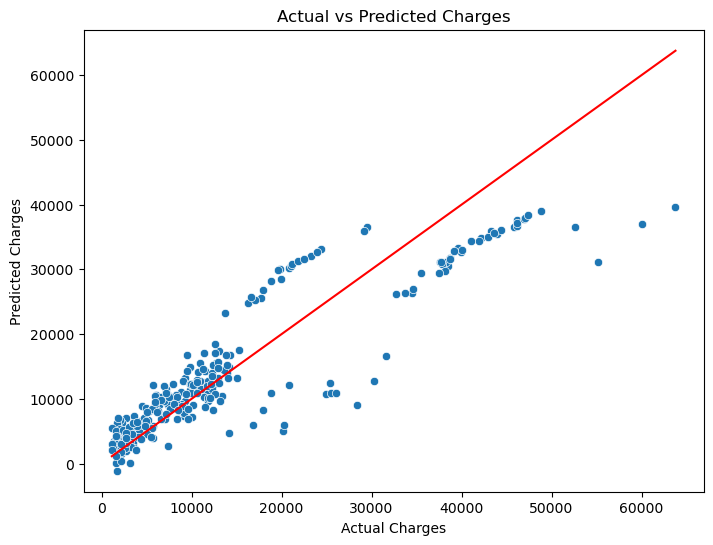

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # diagonal line
plt.show()


In [44]:
print(df['charges'].max())
print(df['charges'].min())
print(df['charges'].mean())

63770.42801
1121.8739
13279.121486655948


checking if charges data is skewed since mean absolute error is 4177 which is the prediction is off by $4177 on average

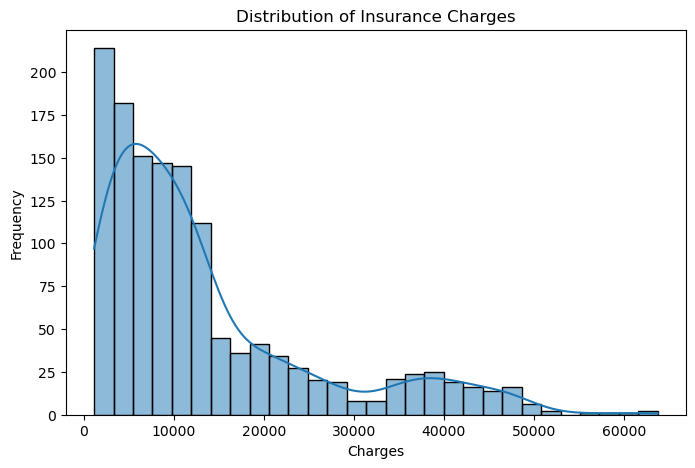

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()


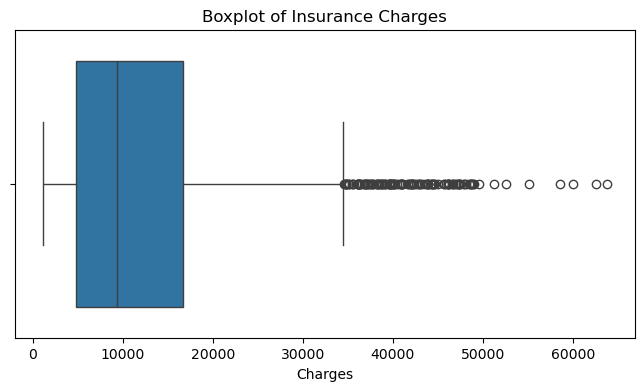

In [46]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['charges'])
plt.title('Boxplot of Insurance Charges')
plt.xlabel('Charges')
plt.show()


removing outliers through IQR method

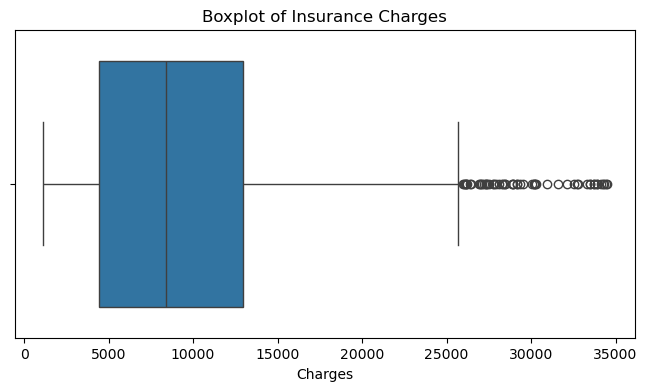

In [47]:
Q1 = df_encoded['charges'].quantile(0.25)
Q3 = df_encoded['charges'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_filter= df_encoded[(df_encoded['charges'] >= lower) & (df_encoded['charges'] <= upper)]
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_filter['charges'])
plt.title('Boxplot of Insurance Charges')
plt.xlabel('Charges')
plt.show()



now retrain the model with the removed outliers

What is Scaling?
Scaling means transforming your data so that all features (columns) have a similar scale or range — for example, values mostly between 0 and 1, or with mean 0 and standard deviation 1.

Common scaling methods:

StandardScaler: subtract mean, divide by standard deviation → results in mean=0, std=1

MinMaxScaler: scales features to a fixed range (usually 0 to 1)

Why Do We Need Scaling?
Models Are Sensitive to Feature Magnitude

Many machine learning algorithms (like Linear Regression, Logistic Regression, K-Nearest Neighbors, SVMs, Neural Networks) calculate distances or assume all features contribute equally.
If one feature is on a large scale (e.g., age from 0–100) and another on a small scale (0 or 1), the large scale feature will dominate the model’s learning and predictions.

Faster and More Stable Training

Scaling features can help algorithms converge faster and avoid numerical issues during optimization.

Fair Feature Contribution

After scaling, all features have comparable ranges, so the model weights (coefficients) reflect their real importance more accurately.

Required for Some Algorithms

Algorithms like SVM, KNN, and Gradient Descent-based models expect scaled features to work well

R² score: 0.5746
MAE: 2609.19


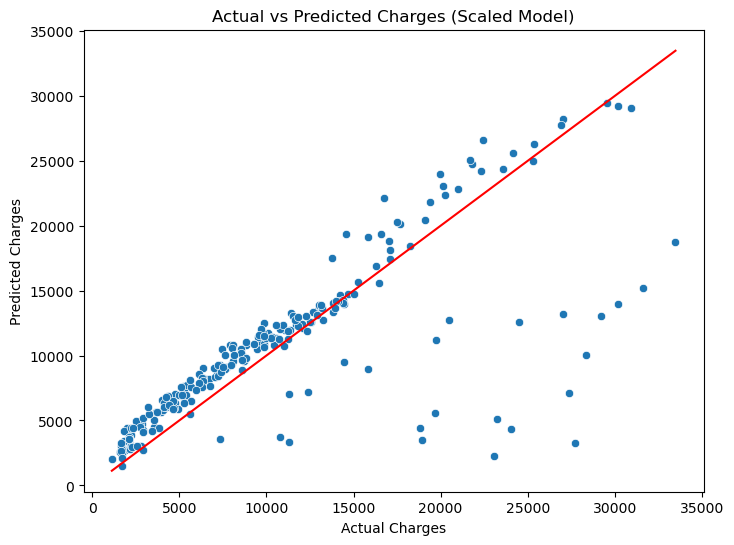

In [48]:
from sklearn.preprocessing import StandardScaler
# -------------------------------
# 1. Prepare features and target
# -------------------------------
X = df_filter.drop('charges', axis=1)
y = df_filter['charges']

# -------------------------------
# 2. Split the data
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------
# 3. Scale the features
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# 4. Train the model
# -------------------------------
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# -------------------------------
# 5. Evaluate on test data
# -------------------------------
y_pred = model.predict(X_test_scaled)

print(f"R² score: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")

# -------------------------------
# 6. Plot actual vs predicted
# -------------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges (Scaled Model)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()


In [49]:
# Sample input with same columns and order as training data
sample = pd.DataFrame([{
    'age': 70,
    'bmi': 28.5,
    'children': 2,
    'sex_male': 1,
    'smoker_yes': 1,
    'region_northwest': 1,
    'region_southeast': 0,
    'region_southwest': 0
}])
# Scale the sample input
sample_scaled = scaler.transform(sample)

# Predict
predicted_charge = model.predict(sample_scaled)
print(f"Predicted Insurance Charge: ${predicted_charge[0]:.2f}")


Predicted Insurance Charge: $31136.62


the difference between a scalled trained model and an unscalled one will be clear as the magnitudes of the input change significantly